In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from scipy import stats
import seaborn as sns

## Load input tables for figures

In [2]:
rmse_by_weighting = pd.read_excel('input tables/rmse_by_weighting_method.xlsx')
dist_errors = pd.read_excel('input tables/dist_errors_bucket_table.xlsx')
election_competitiveness_rmse = pd.read_excel('input tables/election_rmse_by_competitiveness_range.xlsx')

## Figure: RMSE Histogram by Weighting Method

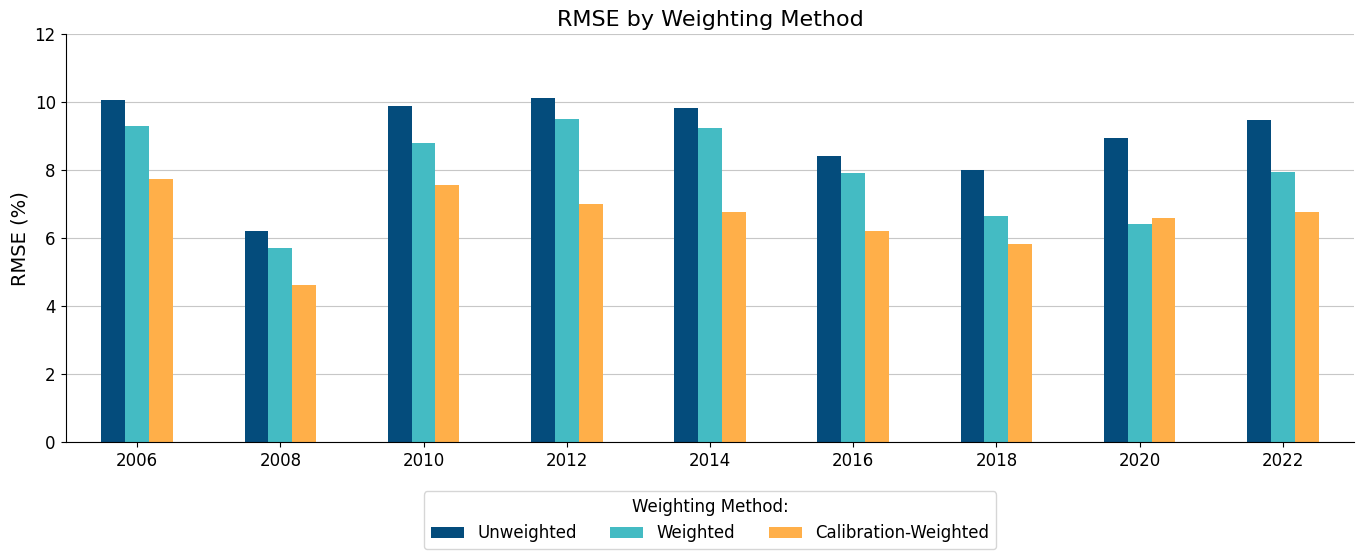

In [3]:
# Pivot to wide format: rows = Year, columns = Weighting_Method, values = Avg_RMSE
average_rmse = rmse_by_weighting.pivot(index='Year', columns='Weighting_Method', values='Avg_RMSE')

# Desired order
column_order = ['CES-Unweighted', 'CES-Provided Weights', 'ANESRake']
colors = ['#044c7c', '#44bbc3', '#ffaf49']  # dark blue, light teal, orange
legend_labels = ['Unweighted', 'Weighted', 'Calibration-Weighted']

# Reorder columns
average_rmse = average_rmse[column_order]

# Plotting
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(average_rmse.index, rotation=0)
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('RMSE by Weighting Method', fontsize=16)
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adjust legend
plt.legend(
    title='Weighting Method:',
    labels=legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=12,
    title_fontsize=12
)

# Layout and save
plt.tight_layout(pad=2.0)
plt.savefig('output figures/average_rmse_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure: Deltas in RMSE Between Unweighted and CES-Weighted

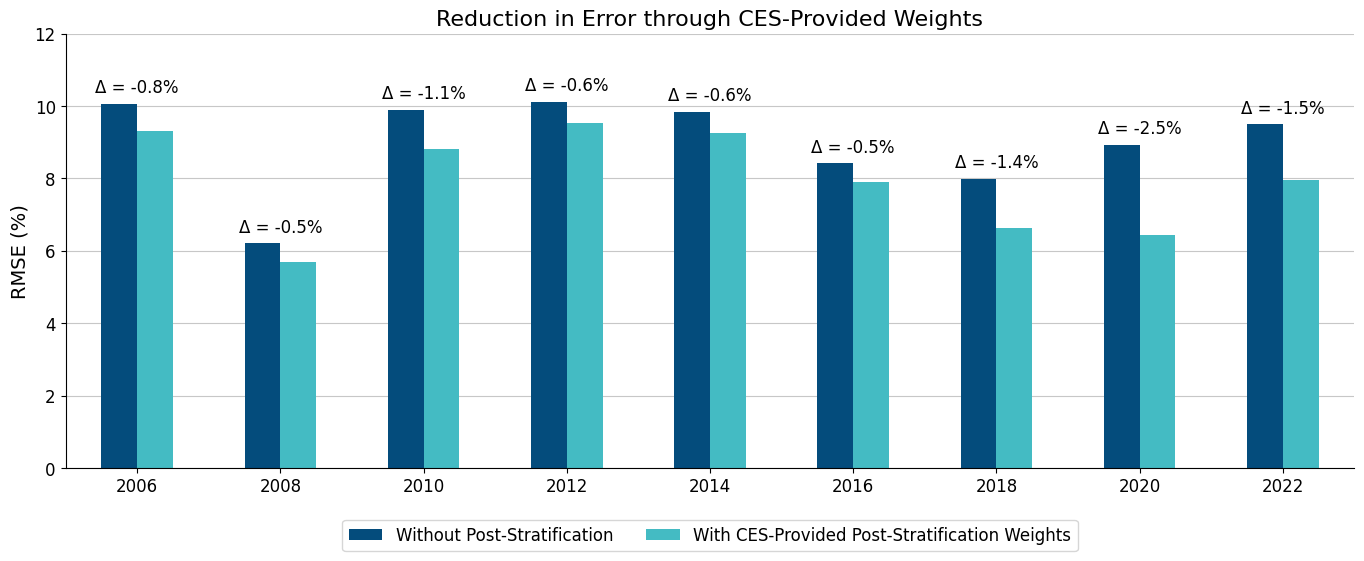

In [4]:
df = rmse_by_weighting.rename(columns=lambda x: x.strip())

# Pivot the table: Year as index, Weighting Method as columns
rmse_table = df.pivot(index='Year', columns='Weighting_Method', values='Avg_RMSE')

# Calculate differences between CES-Provided Weights and CES-Unweighted
differences = rmse_table['CES-Provided Weights'] - rmse_table['CES-Unweighted']

# Define plotting order and colors
column_order = ['CES-Unweighted', 'CES-Provided Weights']  # Flipped order
colors = ['#044c7c', '#44bbc3']  # Corresponding colors

# Plotting
ax = rmse_table[column_order].plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(rmse_table.index, rotation=0)
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('Reduction in Error through CES-Provided Weights', fontsize=16)
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)  # Only horizontal grid lines
# Remove vertical grid lines if any (ensure only y-axis grid is shown)
ax.grid(axis='x', visible=False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add delta text
for i, year in enumerate(rmse_table.index):
    diff = differences[year]
    bar_height = rmse_table['CES-Unweighted'][year]
    ax.text(i, bar_height + 0.2, f'Δ = {diff:.1f}%', ha='center', va='bottom', fontsize=12)

# Legend tweaks
legend_labels = ['Without Post-Stratification', 'With CES-Provided Post-Stratification Weights']
plt.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Layout and save
plt.tight_layout(pad=2.0)
plt.savefig('output figures/rmse_reduction_histogram.png', dpi=300, bbox_inches='tight')
plt.show()


## Figure: RMSE by Race Competetiveness

/var/folders/xf/837xl0rs49194z6g15hkf22m0000gn/T/ipykernel_26300/2352880443.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rmse_by_range = df.groupby('Range_Label')['RMSE'].mean().reindex(range_order)


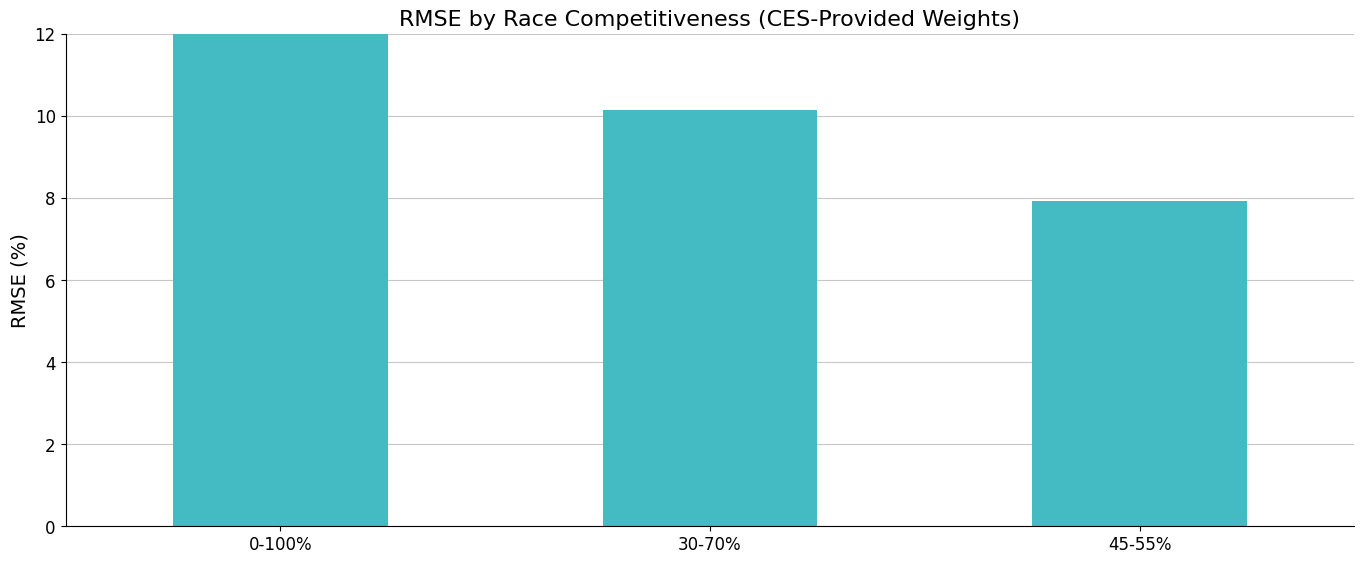

In [5]:
# Load data
df = pd.read_excel('election_rmse_by_competitiveness_range.xlsx')

# Filter for CES-Provided Weights only
df = df[df['Weighting_Method'] == 'CES-Provided Weights'].copy()

# Define desired order of ranges
range_order = ['0-100%', '30-70%', '45-55%']
df['Range_Label'] = pd.Categorical(df['Range_Label'], categories=range_order, ordered=True)
df = df.sort_values('Range_Label')

# Calculate average RMSE by range
avg_rmse_by_range = df.groupby('Range_Label')['RMSE'].mean().reindex(range_order)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
avg_rmse_by_range.plot(kind='bar', color='#44bbc3', zorder=2, ax=ax)

# Style and labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(avg_rmse_by_range.index, rotation=0, fontsize=12)
ax.set_ylabel('RMSE (%)', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.set_ylim(0, 12)
plt.title('RMSE by Race Competitiveness (CES-Provided Weights)', fontsize=16)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
ax.tick_params(axis='y', labelsize=12)


# Save and show
plt.tight_layout(pad=2.0)
plt.savefig('output figures/rmse_by_competitiveness_ces_weighted.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure: Testing for Trends in Error Over Time

ANESRake Regression:
  Slope: -0.020
  Intercept: 46.322
  R-squared: 0.013
  P-value: 0.769
  Std. Error: 0.064

CES-Provided Weights Regression:
  Slope: -0.077
  Intercept: 162.386
  R-squared: 0.089
  P-value: 0.435
  Std. Error: 0.093

CES-Unweighted Regression:
  Slope: 0.003
  Intercept: 2.424
  R-squared: 0.000
  P-value: 0.972
  Std. Error: 0.089



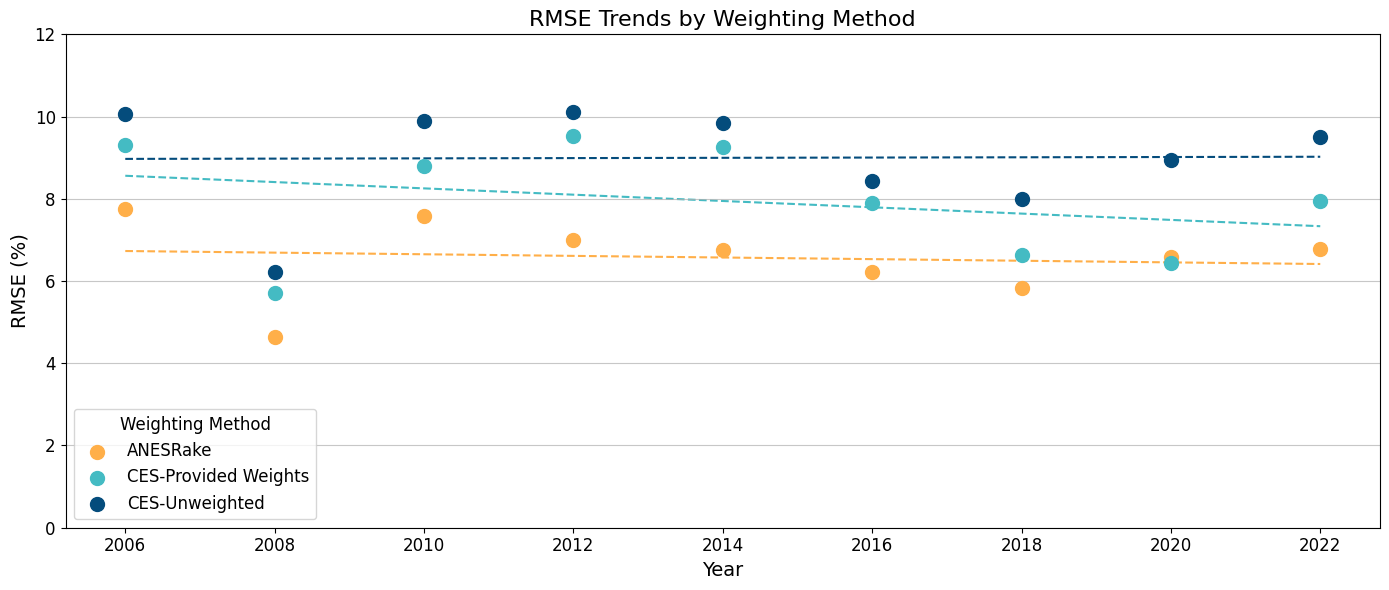

In [6]:
# Clean column names
rmse_by_weighting.columns = rmse_by_weighting.columns.str.strip()

# Set up plot
plt.figure(figsize=(14, 6))

# Define colors for each method
colors = {
    'CES-Provided Weights': '#44bbc3',
    'CES-Unweighted': '#044c7c',
    'ANESRake': '#ffaf49'
}

# Loop through each method
for method in rmse_by_weighting['Weighting_Method'].unique():
    data = rmse_by_weighting[rmse_by_weighting['Weighting_Method'] == method]
    x = data['Year']
    y = data['Avg_RMSE']
    
    # Plot scatter
    plt.scatter(x, y, label=method, color=colors[method], s=100, zorder=2)
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, linestyle='--', color=colors[method], zorder=1)
    
    # Optional: print regression stats for each method
    print(f"{method} Regression:")
    print(f"  Slope: {slope:.3f}")
    print(f"  Intercept: {intercept:.3f}")
    print(f"  R-squared: {r_value**2:.3f}")
    print(f"  P-value: {p_value:.3f}")
    print(f"  Std. Error: {std_err:.3f}\n")

# Format the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('RMSE Trends by Weighting Method', fontsize=16)
plt.ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Weighting Method', fontsize=12, title_fontsize=12)
plt.tight_layout()

# Save and show
plt.savefig('output figures/rmse_trends_all_methods.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure: Distribution of Errors

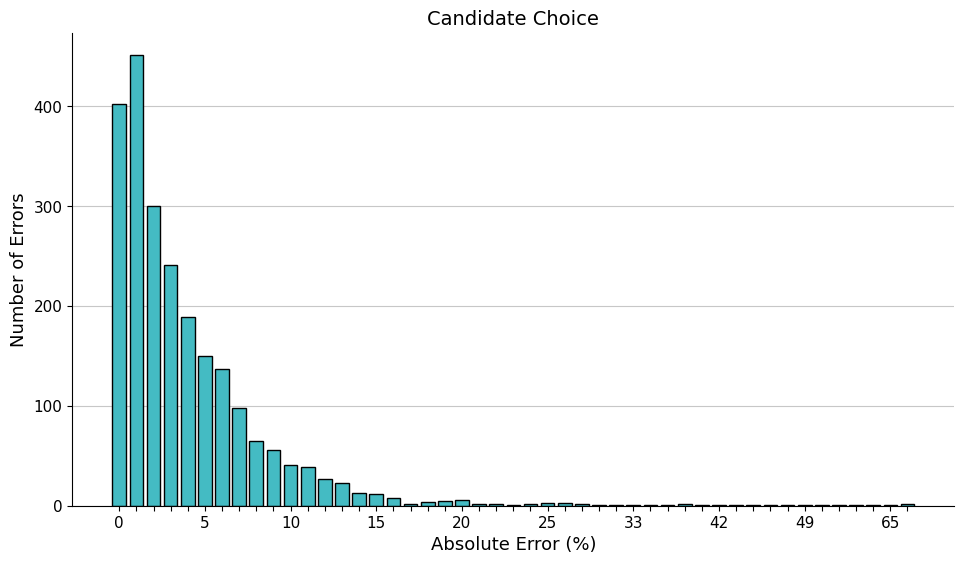

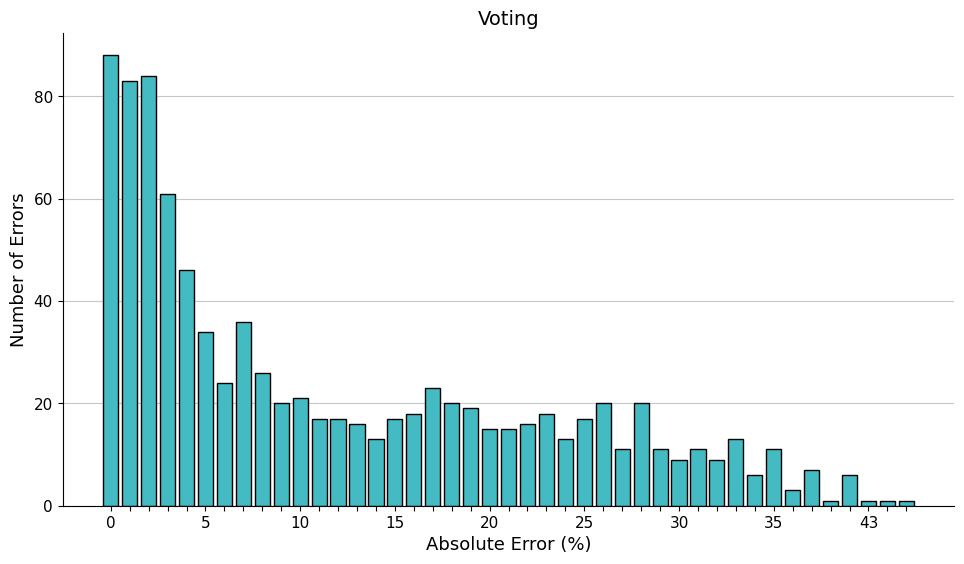

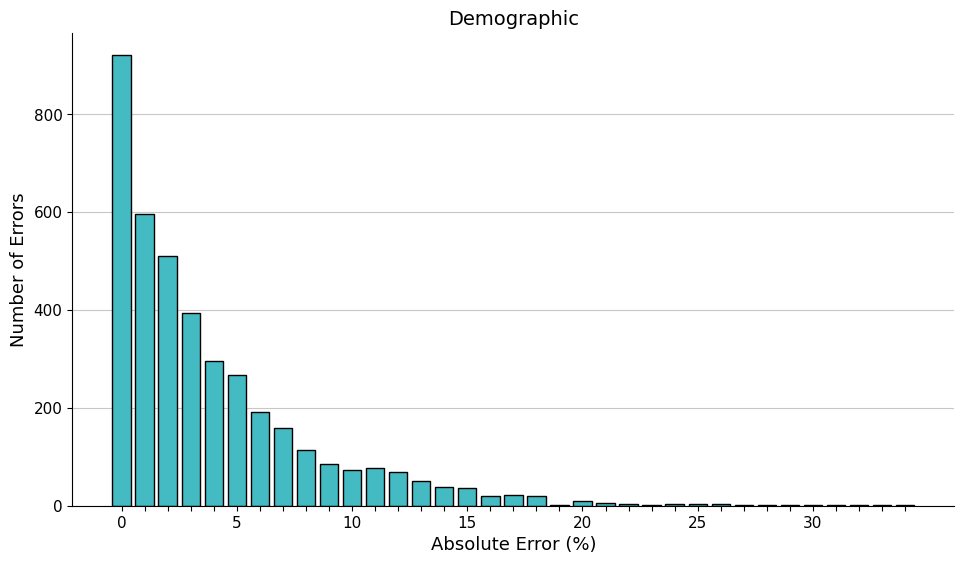

In [7]:
# Filter for CES-Provided Weights
dist_errors = dist_errors[dist_errors['Weighting_Method'] == 'CES-Provided Weights']

# Ensure Error_Bucket is ordered properly
dist_errors['Error_Bucket'] = pd.Categorical(
    dist_errors['Error_Bucket'],
    ordered=True,
    categories=sorted(dist_errors['Error_Bucket'].unique(), key=lambda x: float(str(x).strip('[').split(',')[0]))
)

# Create three separate plots
class_order = ['Candidate Choice', 'Voting', 'Demographic']
color = '#44bbc3'

for i, class_name in enumerate(class_order):
    # Create individual figure for each class
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    data = dist_errors[dist_errors['Class'] == class_name]
    ax.bar(data['Error_Bucket'].astype(str), data['Count'], color=color, edgecolor='black', zorder=2)
    
    ax.set_title(class_name, fontsize=14)
    ax.set_xlabel('Absolute Error (%)', fontsize=13)
    ax.set_ylabel('Number of Errors', fontsize=13)
    ax.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=11, rotation=0)
    ax.tick_params(axis='y', labelsize=11)
    
    # Customize x-axis labels to show only every 5th label
    x_positions = range(len(data['Error_Bucket']))
    x_labels = []
    for j, bucket in enumerate(data['Error_Bucket']):
        if j % 5 == 0:  # Show label every 5 positions
            # Extract just the first number from the bucket (e.g., "0" from "[0, 5)")
            bucket_str = str(bucket)
            first_num = bucket_str.strip('[').split(',')[0]
            x_labels.append(first_num)
        else:
            x_labels.append('')
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels)
    
    # Add arrow or label to show direction of increasing competitiveness
    #fig.text(0.5, -0.08, '← Less Accurate   |   More Accurate →', ha='center', fontsize=12, style='italic')
    
    # Save each plot separately
    plt.tight_layout(pad=2.0)
    plt.savefig(f'output figures/rmse_distribution_{class_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()